# WEBSITE PERFORMANCE ANALYSIS

##### Tanvi Bhole

Website Performance Analysis involves evaluating various metrics related to a website’s functionality, user engagement, and overall success in achieving business goals. This form of analysis is critical because it directly impacts user experience, conversion rates, and the profitability and reputation of a business.

In [24]:
#Importing Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import acf, pacf
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [25]:
#Importing the dataset
data = pd.read_csv(r"C:/Users/Niranjan Bhole/Desktop/Tanvi Projects/Website performance Analysis/data-export.csv")
print(data.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

Since the 1st row has some errors, we will remove it.

In [26]:
#Grabbing the 1st row
new_header = data.iloc[0] 

#Selecting the data without the first row
data = data[1:]

#Changing header
data.columns = new_header

data.reset_index(drop=True, inplace=True)
print(data.head())

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3   

In [27]:
#Checking the data and its summary statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [28]:
data.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [29]:
#Checking for null values
data.isnull().sum()

0
Session primary channel group (Default channel group)    0
Date + hour (YYYYMMDDHH)                                 0
Users                                                    0
Sessions                                                 0
Engaged sessions                                         0
Average engagement time per session                      0
Engaged sessions per user                                0
Events per session                                       0
Engagement rate                                          0
Event count                                              0
dtype: int64

In [30]:
data

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [31]:
#Converting columns to appropriate types

data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])
data['Event count'] = pd.to_numeric(data['Event count'])

# Group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

The overall purpose of the above operation is to prepare and summarize the dataset for time series analysis, focusing on how user engagement (through sessions) varies by time. By converting data into appropriate types and grouping it by time, we can more easily perform operations like plotting time series graphs, calculating moving averages, or applying time series forecasting models.

## 1. SESSION ANALYSIS

Understanding the temporal distribution and trends in web sessions and user visits to identify peak times and low-traffic periods.

##### | Temporal Distribution of Session - Hourly/Daily/Weekly Analysis |

Enter the analysis type (Hourly, Daily, Day of the Week):  Hourly


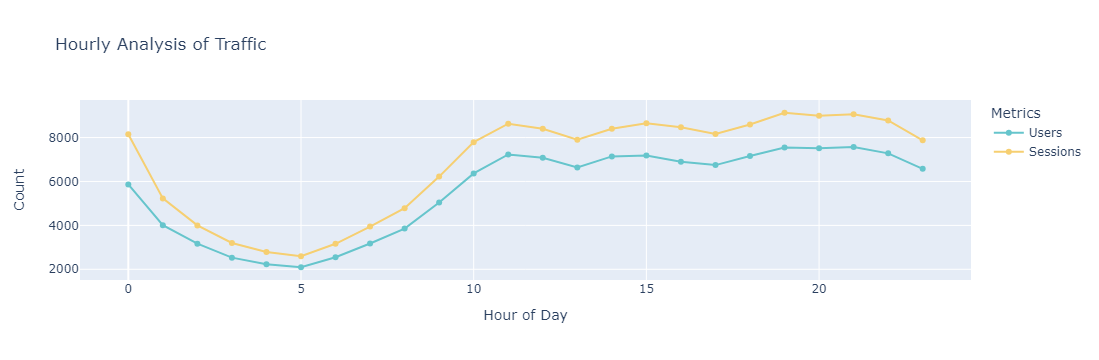

In [32]:
# Creating a Function to generate the graphs based on user input
def generate_temporal_analysis(data, analysis_type):
    if analysis_type == 'Hourly':
        data['Hour'] = data['Date + hour (YYYYMMDDHH)'].dt.hour
        hourly_data = data.groupby('Hour').agg({'Users': 'sum', 'Sessions': 'sum'}).reset_index()
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=hourly_data['Hour'], y=hourly_data['Users'], mode='lines+markers', name='Users', line=dict(color='rgb(102,197,204)')))
        fig.add_trace(go.Scatter(x=hourly_data['Hour'], y=hourly_data['Sessions'], mode='lines+markers', name='Sessions', line=dict(color='rgb(246,207,113)')))
        
        fig.update_layout(title='Hourly Analysis of Traffic', xaxis_title='Hour of Day', yaxis_title='Count', legend_title='Metrics')
        
    elif analysis_type == 'Daily':
        data['Date'] = data['Date + hour (YYYYMMDDHH)'].dt.date
        daily_data = data.groupby('Date').agg({'Users': 'sum', 'Sessions': 'sum'}).reset_index()
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=daily_data['Date'], y=daily_data['Users'], mode='lines+markers', name='Users', line=dict(color='rgb(102,197,204)')))
        fig.add_trace(go.Scatter(x=daily_data['Date'], y=daily_data['Sessions'], mode='lines+markers', name='Sessions', line=dict(color='rgb(246,207,113)')))
        
        fig.update_layout(title='Daily Analysis of Traffic', xaxis_title='Date', yaxis_title='Count', legend_title='Metrics')
        

    elif analysis_type == 'Day of the Week':
        data['Day of Week'] = data['Date + hour (YYYYMMDDHH)'].dt.day_name()
        day_of_week_data = data.groupby('Day of Week').agg({'Users': 'sum', 'Sessions': 'sum'}).reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ]).reset_index()
        
        fig = go.Figure()
        fig.add_trace(go.Bar(x=day_of_week_data['Day of Week'], y=day_of_week_data['Users'], name='Users', marker_color='rgb(102,197,204)'))
        fig.add_trace(go.Bar(x=day_of_week_data['Day of Week'], y=day_of_week_data['Sessions'], name='Sessions', marker_color='rgb(246,207,113)'))
        
        fig.update_layout(title='Seasonal Trends: Traffic by Day of Week', xaxis_title='Day of Week', yaxis_title='Count', legend_title='Metrics', barmode='group')
    
    else:
        raise ValueError("Invalid analysis type. Choose from 'Hourly', 'Daily', or 'Day of the Week'.")
    
    fig.show()

# User input for analysis type
analysis_type = input("Enter the analysis type (Hourly, Daily, Day of the Week): ")
generate_temporal_analysis(data, analysis_type)


##### FINDINGS & INSIGHTS:

##### **HOURLY**:
1. **Early Morning Dip** (Midnight to 5 AM): Low activity as users are likely inactive.
2. **Morning Surge** (6 AM to 9 AM): Users engage as they start their day.
3. **Midday Stability** (10 AM to 5 PM): Stable traffic with users engaging in multiple sessions.
4. **Evening Peak** (6 PM to 9 PM): Increased activity during leisure time after work/school.
5. **Late Evening Decline** (10 PM onwards): Traffic declines as users wind down for the night.


##### **DAILY**:
1. **Overall Trend:** There are noticeable fluctuations in the number of users and sessions on a daily basis.There's no consistent upward or downward pattern but rather the trend fluctuates throughout the observed period.
2. **Peak Days:** There are noticeable peaks around April 14 and April 27, suggesting that certain days have significantly higher user activity and engagement, which could be attributed to specific events, promotions, or content updates.
3. **Valleys:** There are troughs observed immediately after the peaks, indicating a drop in activity. These drops might suggest a cooldown period following high engagement days, possibly indicating that users return to normal activity levels after an event or special content.
4. **User vs. Session Trends:** The number of sessions is consistently higher than the number of users, suggesting that users are engaging in multiple sessions per day, indicating high engagement from the active users.
5. **Periodic Stability:** There are periods where the number of users and sessions remain relatively stable, particularly in the mid-April period.
Stability in these periods can indicate steady regular engagement without significant external influence.

##### **DAY OF THE WEEK**:
**Day to day analysis:**
1. Monday: Moderate start to the week with around 20k users and slightly more sessions.
2. Tuesday: Traffic increases compared to Monday, peaking for the first half of the week with over 25k sessions.
3. Wednesday: Slight decline in traffic from Tuesday but still maintains high engagement with around 20k users and 25k sessions.
4. Thursday: Another peak similar to Tuesday, indicating high mid-week engagement.
5. Friday: Slight drop compared to Thursday but still maintains strong traffic, indicating continued engagement before the weekend.
6. Saturday: Noticeable decline in traffic with the lowest numbers for both users and sessions, suggesting a drop in engagement during weekends.
7. Sunday: Slight recovery from Saturday but still lower than weekdays, showing moderate engagement as users prepare for the upcoming week.
   
**Key Insights:**
1. High Engagement Days: Tuesday and Thursday show the highest traffic, indicating peak engagement mid-week.Targeting these days for important updates, announcements, or promotions could be beneficial.
2. Weekend Drop: Saturday shows the lowest traffic, suggesting a significant drop in user activity during weekends. Understanding user behavior on weekends could help devise strategies to boost engagement during these days.
3. User Consistency:Despite daily fluctuations, sessions consistently outnumber users, indicating strong repeated engagement by the users. This repeated engagement can be leveraged to introduce loyalty programs or daily engagement incentives.


## 2. USER ENGAGEMENT ANALYSIS
Evaluating how engaged users are during their sessions across different channels, aiming to enhance user interaction and satisfaction.

##### | Users and Sessions Over Time |

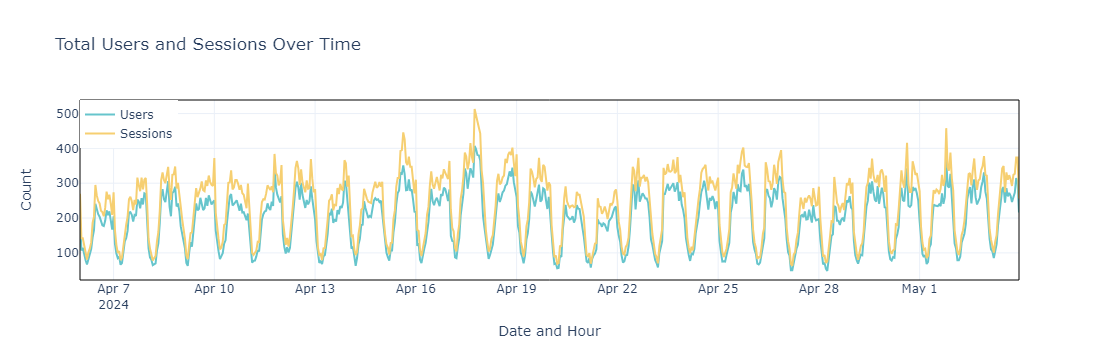

In [33]:
# Create the figure
fig = go.Figure()

# Add a line trace for Users
fig.add_trace(go.Scatter(
    x=grouped_data.index,
    y=grouped_data['Users'],
    mode='lines',
    name='Users',
    line=dict(color='rgb(102,197,204)')
))

# Add a line trace for Sessions
fig.add_trace(go.Scatter(
    x=grouped_data.index,
    y=grouped_data['Sessions'],
    mode='lines',
    name='Sessions',
    line=dict(color='rgb(246,207,113)')
))

# Update the layout
fig.update_layout(
    title='Total Users and Sessions Over Time',
    xaxis_title='Date and Hour',
    yaxis_title='Count',
    legend=dict(x=0, y=1.0),
    hovermode='x unified',
    template='plotly_white',
    shapes=[
        dict(
            type="rect",
            xref="paper",
            yref="paper",
            x0=0,
            y0=0,
            x1=1,
            y1=1,
            line=dict(
                color="black",
                width=1,
            )
        )
    ]
)

# Show the figure
fig.show()


##### KEY FINDINGS:
1. **Weekends vs. Weekdays:** Weekdays show more consistent and higher peaks in both users and sessions compared to weekends. This suggests that users are more active during the weekdays. Weekends (especially Saturdays) show slightly lower peaks, indicating reduced engagement.
2. **Steady Growth:** There is a slight upward trend towards the end of the observed period, indicating a gradual increase in user engagement over time.
3. **Significant Dates:** Noticeable peaks on April 14th and 27th suggest that specific events, promotions, or content updates might have driven higher engagement on these dates.
   
##### KEY INSIGHTS:
1. **Peak Engagement Times:** Target key updates, promotions, or content releases during the midday to evening hours to capitalize on high user activity.
2. **Weekend Strategies:** Implement strategies to boost weekend engagement, such as special weekend content, promotions.
3. **Event-driven Spikes:** Analyze spikes around April 14 and April 27 to replicate successful strategies.
4. **User Retention:** Introduce features encouraging repeated visits, such as daily updates/interactions
5. **Growth Monitoring:** Continue monitoring upward trend to maintain and accelerate engagement growth.

##### | Engagement Metrics |                                                               

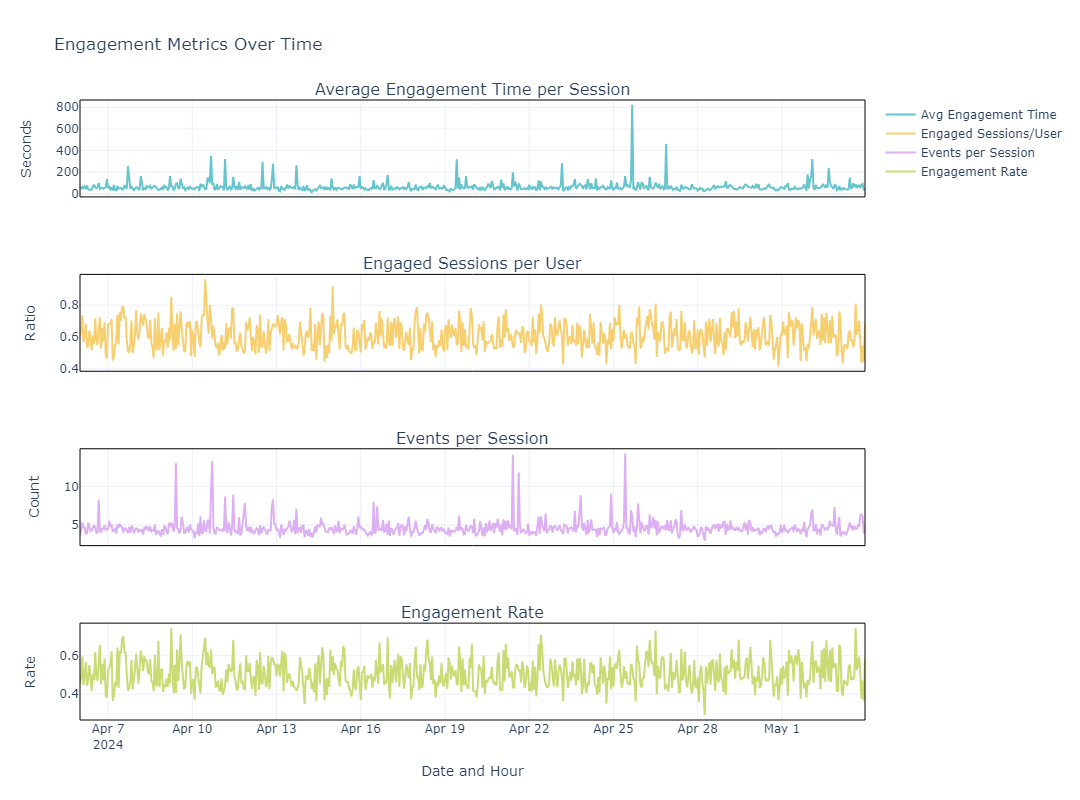

In [34]:

# Group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=(
    'Average Engagement Time per Session',
    'Engaged Sessions per User',
    'Events per Session',
    'Engagement Rate'
))

# Add traces for each engagement metric
fig.add_trace(go.Scatter(
    x=engagement_metrics.index,
    y=engagement_metrics['Average engagement time per session'],
    mode='lines',
    name='Avg Engagement Time',
    line=dict(color='rgb(102,197,204)')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=engagement_metrics.index,
    y=engagement_metrics['Engaged sessions per user'],
    mode='lines',
    name='Engaged Sessions/User',
    line=dict(color='rgb(246,207,113)')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=engagement_metrics.index,
    y=engagement_metrics['Events per session'],
    mode='lines',
    name='Events per Session',
    line=dict(color='rgb(220,176,242)')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=engagement_metrics.index,
    y=engagement_metrics['Engagement rate'],
    mode='lines',
    name='Engagement Rate',
    line=dict(color='rgb(201,219,116)')
), row=4, col=1)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text='Engagement Metrics Over Time',
    showlegend=True,
    template='plotly_white'
)

# Update axes titles
fig.update_yaxes(title_text='Seconds', row=1, col=1)
fig.update_yaxes(title_text='Ratio', row=2, col=1)
fig.update_yaxes(title_text='Count', row=3, col=1)
fig.update_yaxes(title_text='Rate', row=4, col=1)
fig.update_xaxes(title_text='Date and Hour', row=4, col=1)

# Add thin borders to each subplot
for i in range(1, 5):
    fig.add_shape(type="rect",
                  xref="x domain", yref="y domain",
                  x0=0, x1=1, y0=0, y1=1,
                  line=dict(color="black", width=1),
                  row=i, col=1)

# Show the figure
fig.show()


1. **Average Engagement Time per Session**
- This metric reflects how much time users are willing to spend on your platform per session. Higher engagement times often correlate with higher satisfaction and value derived from the platform.
- Helps in assessing the effectiveness of content. If users spend more time, it indicates that the content is engaging and fulfilling their needs.
- Longer engagement times can be an indicator of good user retention strategies, as users are more likely to return to a platform where they spend more time.
  
2. **Engaged Sessions per User**
- This metric indicates how often users are coming back to the platform within a certain period, providing insights into user engagement levels.
- Helps in understanding user behavior and how often they interact with the platform, which is crucial for planning engagement strategies.
  
3. **Events per Session**
- Shows how many interactions (events) a user completes in a single session, indicating the depth of engagement.
- Helps in understanding which features or actions users find most valuable or engaging within each session.
- Helps in mapping the user journey and identifying touchpoints that are critical for engagement, leading to better user experience design.
  
4. **Engagement Rate**
- This metric provides a high-level view of user interaction rates, indicating the overall engagement health of the platform.
- High engagement rates can signal successful marketing campaigns or content strategies.
- Understanding engagement rates helps in strategic planning, ensuring resources are allocated to areas that drive high user interaction.

| CORRELATION BETWEEN ENGAGEMENT METRICS |

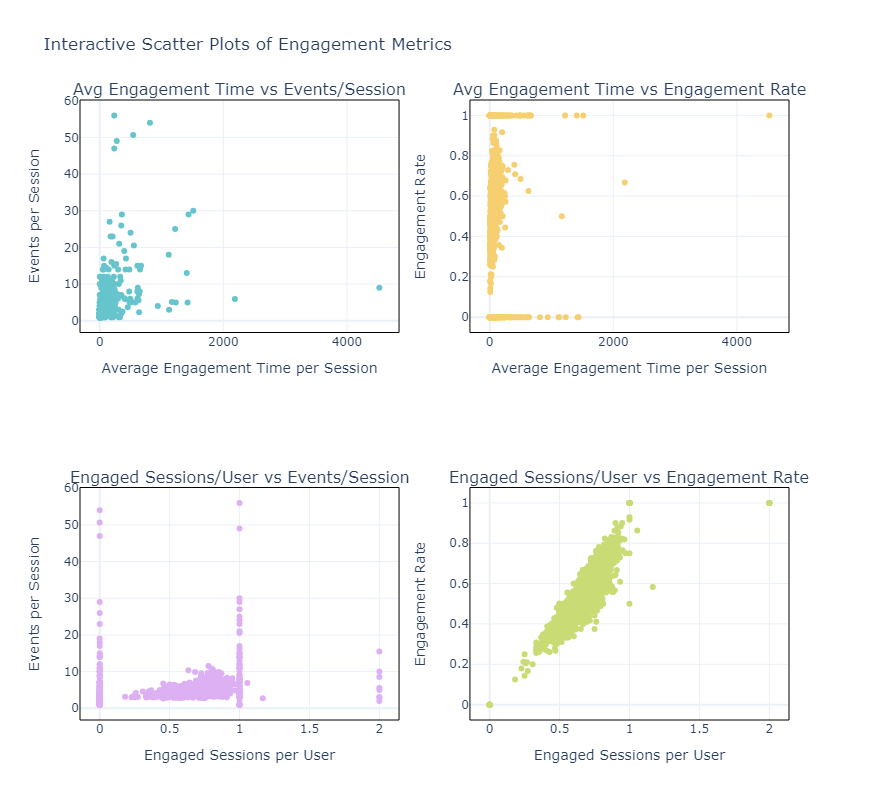

In [35]:
# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Avg Engagement Time vs Events/Session',
        'Avg Engagement Time vs Engagement Rate',
        'Engaged Sessions/User vs Events/Session',
        'Engaged Sessions/User vs Engagement Rate'
    )
)

# Add scatter plots
# Plot 1: average engagement time vs events per session
fig.add_trace(go.Scatter(
    x=data['Average engagement time per session'],
    y=data['Events per session'],
    mode='markers',
    name='Avg Engagement Time vs Events/Session',
    marker=dict(color='rgb(102,197,204)')
), row=1, col=1)

# Plot 2: average engagement time vs engagement rate
fig.add_trace(go.Scatter(
    x=data['Average engagement time per session'],
    y=data['Engagement rate'],
    mode='markers',
    name='Avg Engagement Time vs Engagement Rate',
    marker=dict(color='rgb(246,207,113)')
), row=1, col=2)

# Plot 3: engaged sessions per user vs events per session
fig.add_trace(go.Scatter(
    x=data['Engaged sessions per user'],
    y=data['Events per session'],
    mode='markers',
    name='Engaged Sessions/User vs Events/Session',
    marker=dict(color='rgb(220,176,242)')
), row=2, col=1)

# Plot 4: engaged sessions per user vs engagement rate
fig.add_trace(go.Scatter(
    x=data['Engaged sessions per user'],
    y=data['Engagement rate'],
    mode='markers',
    name='Engaged Sessions/User vs Engagement Rate',
    marker=dict(color='rgb(201,219,116)')
), row=2, col=2)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text='Interactive Scatter Plots of Engagement Metrics',
    showlegend=False,
    template='plotly_white'
)

# Update axes titles
fig.update_xaxes(title_text='Average Engagement Time per Session', row=1, col=1)
fig.update_yaxes(title_text='Events per Session', row=1, col=1)

fig.update_xaxes(title_text='Average Engagement Time per Session', row=1, col=2)
fig.update_yaxes(title_text='Engagement Rate', row=1, col=2)

fig.update_xaxes(title_text='Engaged Sessions per User', row=2, col=1)
fig.update_yaxes(title_text='Events per Session', row=2, col=1)

fig.update_xaxes(title_text='Engaged Sessions per User', row=2, col=2)
fig.update_yaxes(title_text='Engagement Rate', row=2, col=2)

# Add borders around each subplot
for i in range(1, 3):
    for j in range(1, 3):
        fig.add_shape(type="rect",
                      xref="x domain", yref="y domain",
                      x0=0, x1=1, y0=0, y1=1,
                      line=dict(color="black", width=1),
                      row=i, col=j)

# Show the figure
fig.show()


##### 1. Avg Engagement Time vs Events/Session:
Understanding this correlation helps in identifying whether increasing the time users spend on a session directly impacts their activity level, enhancing strategy formulation.
There is a wide dispersion of data points with a weak positive trend. A majority of the sessions have relatively low average engagement time and events per session, suggesting that increasing average engagement time per session might result in more events per session, but the correlation is not very strong. The variation indicates that other factors might influence the number of events per session.

##### 2. Avg Engagement Time vs Engagement Rate
This metric is crucial for understanding the efficiency of user engagement. High engagement rates with low engagement time could be a sign of a very engaging interface or content that quickly captures user interest. There is a cluster of data points at low engagement times, but the engagement rate varies greatly. There seems to be a threshold around 1000 seconds where engagement rate distribution changes. This plot shows that users with low average engagement time can still have high engagement rates. This could indicate that some users are highly efficient with their engagement or that the engagement rate metric is influenced by short but frequent interactions.

##### 3. Engaged Sessions/User vs Events/Session 
This analysis can help in understanding the behavior of different user segments. For example, users with fewer sessions but high events might need different engagement strategies compared to those with frequent but low event sessions.Most data points are concentrated at lower engaged sessions per user with a broad spread of events per session. This suggests that users who have fewer engaged sessions can have varying levels of events per session. This indicates that engaged sessions alone are not a strong predictor of the number of events per session.

##### 4. Engaged Sessions/User vs Engagement Rate
This correlation is vital for retention strategies. Encouraging users to return more frequently can lead to higher engagement rates, which is beneficial for long-term user retention and satisfaction. There is a strong positive correlation between engaged sessions per user and the engagement rate. As the number of engaged sessions per user increases, the engagement rate also increases. This indicates that more frequent engagement sessions are associated with higher overall engagement rates. This can be interpreted as users who return more often are more engaged with the content or services.


## 3. CHANNEL PERFORMANCE ANALYSIS
Assessing the effectiveness of various traffic channels in attracting and retaining users, to optimize marketing spend and strategy.

##### | CHANNEL COMPARISON - Comparing engagement metrics across different channels to identify which channels have the most engaged users |

In [36]:
# Group data by channel and calculate metrics
channel_metrics = data.groupby('Session primary channel group (Default channel group)').agg({
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean',
    'Users': 'sum',
}).reset_index()

print(channel_metrics)


0 Session primary channel group (Default channel group)  Sessions  \
0                                             Direct        37203   
1                                              Email            3   
2                                     Organic Search        33372   
3                                     Organic Social        60627   
4                                      Organic Video          141   
5                                           Referral        30990   
6                                         Unassigned          559   

0  Engaged sessions  Average engagement time per session  \
0             17243                            45.533104   
1                 1                            72.666667   
2             19425                            47.005018   
3             32697                            53.493681   
4               109                           180.360000   
5             20653                            92.660842   
6                 4        

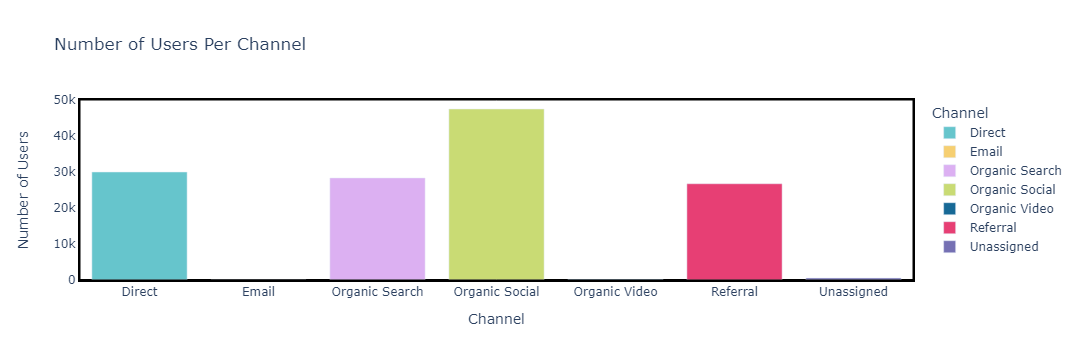

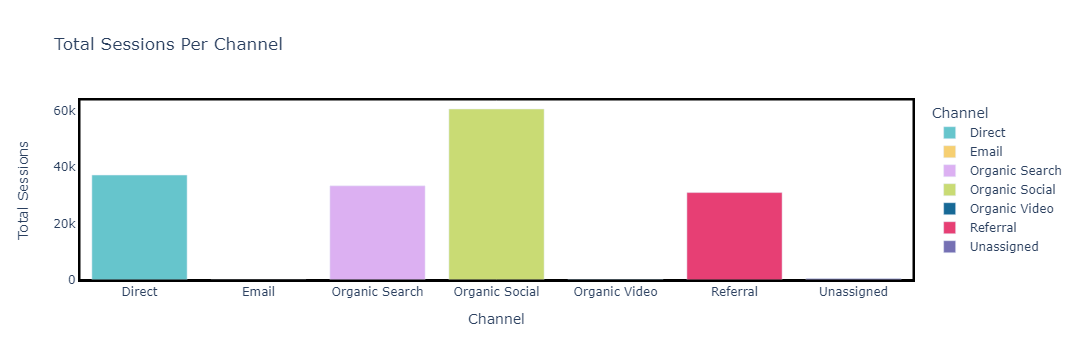

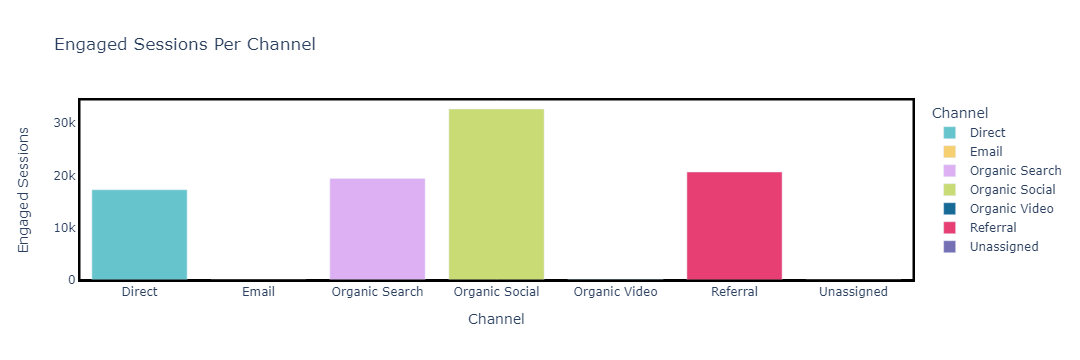

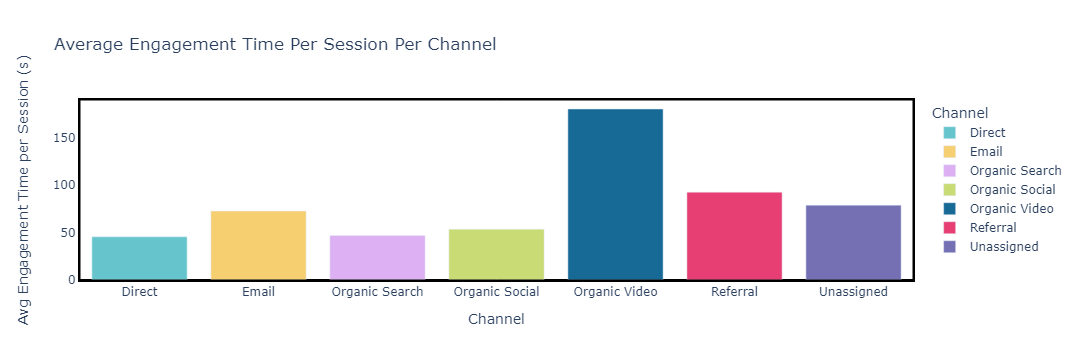

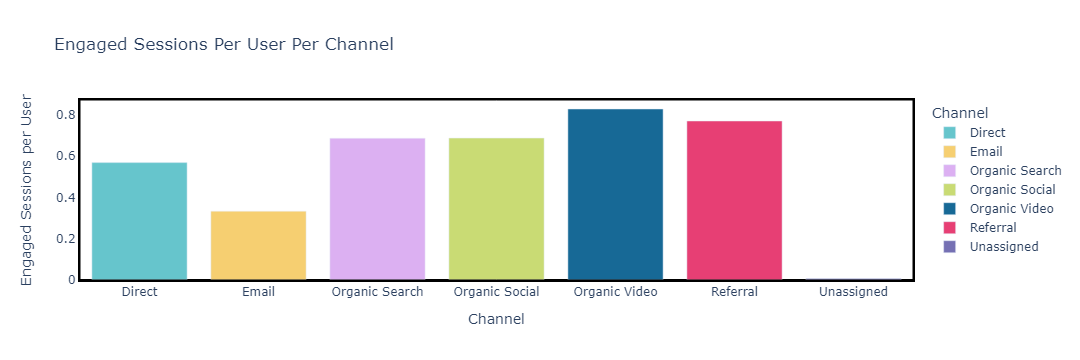

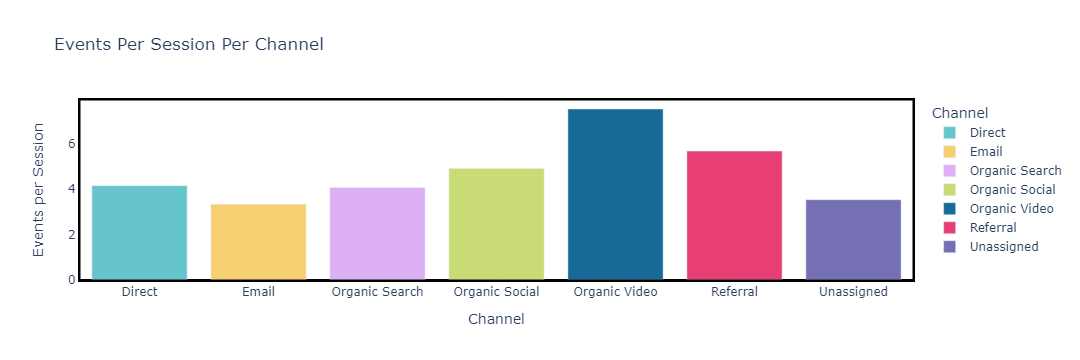

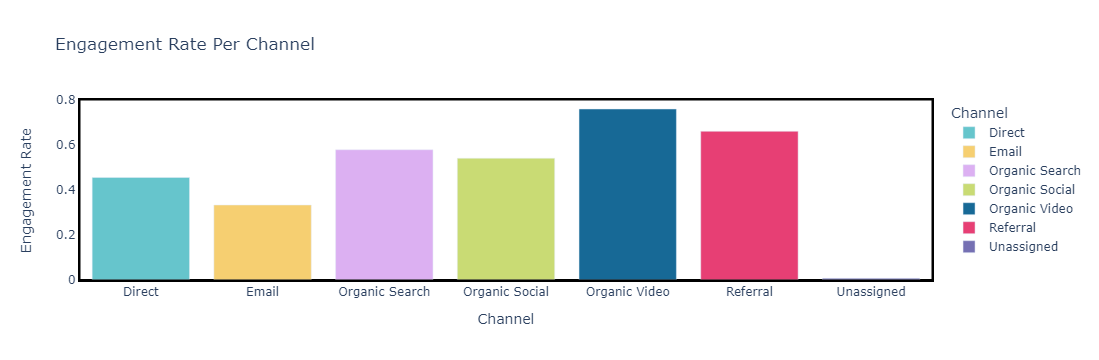

In [37]:
# Define the color sequence
colors = ['rgb(102,197,204)', 'rgb(246,207,113)', 'rgb(220,176,242)', 'rgb(201,219,116)', 'rgb(23,105,150)', 'rgb(231,63,116)', 'rgb(117,112,179)']

def add_borders(fig):
    fig.update_layout(
        shapes=[
            dict(
                type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                line=dict(
                    color="black",
                    width=1,
                )
            )
        ],
        plot_bgcolor='white',  
        paper_bgcolor='white',  
        xaxis=dict(
            showline=True, linewidth=2, linecolor='black', mirror=True, 
            zeroline=True, zerolinewidth=2, zerolinecolor='black'  
        ),
        yaxis=dict(
            showline=True, linewidth=2, linecolor='black', mirror=True,  
            zeroline=True, zerolinewidth=2, zerolinecolor='black'  
        ),
        font=dict(size=12)  # Set font size
    )

def create_bar_chart(data, y, title, y_label):
    fig = px.bar(
        data, 
        x='Session primary channel group (Default channel group)', 
        y=y, 
        title=title, 
        labels={y: y_label, 'Session primary channel group (Default channel group)': 'Channel'},
        color='Session primary channel group (Default channel group)', 
        color_discrete_sequence=colors
    )
    add_borders(fig)
    fig.show()

# Number of Users by Channel
create_bar_chart(
    channel_metrics, 
    y='Users', 
    title='Number of Users Per Channel', 
    y_label='Number of Users'
)

# Plot total sessions per channel
create_bar_chart(
    channel_metrics,
    y='Sessions',
    title='Total Sessions Per Channel',
    y_label='Total Sessions'
)

# Plot engaged sessions per channel
create_bar_chart(
    channel_metrics,
    y='Engaged sessions',
    title='Engaged Sessions Per Channel',
    y_label='Engaged Sessions'
)

# Plot average engagement time per session per channel
create_bar_chart(
    channel_metrics,
    y='Average engagement time per session',
    title='Average Engagement Time Per Session Per Channel',
    y_label='Avg Engagement Time per Session (s)'
)

# Plot engaged sessions per user per channel
create_bar_chart(
    channel_metrics,
    y='Engaged sessions per user',
    title='Engaged Sessions Per User Per Channel',
    y_label='Engaged Sessions per User'
)

# Plot events per session per channel
create_bar_chart(
    channel_metrics,
    y='Events per session',
    title='Events Per Session Per Channel',
    y_label='Events per Session'
)

# Plot engagement rate per channel
create_bar_chart(
    channel_metrics,
    y='Engagement rate',
    title='Engagement Rate Per Channel',
    y_label='Engagement Rate'
)


## 4. WEBSITE TRAFFIC FORECASTING
Predicting future traffic trends to better allocate resources and tailor content delivery according to predicted user demand. We forecast website traffic for the next 24 hours

##### | ACF & PACF |
We start by plotting the autocorrelation and partial autocorrelation plots of our time series data, which is typically done to help identify the order of an autoregressive integrated moving average for time series models for forecasting:

C:\Users\Niranjan Bhole\AppData\Local\Temp\ipykernel_2784\238450963.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



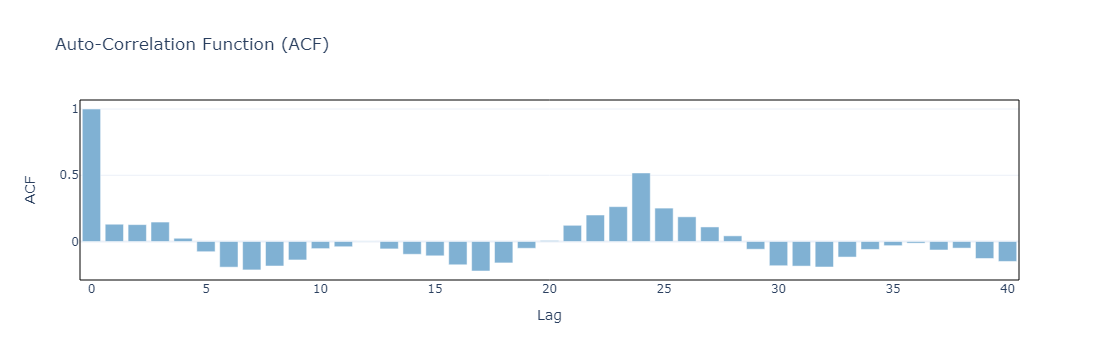

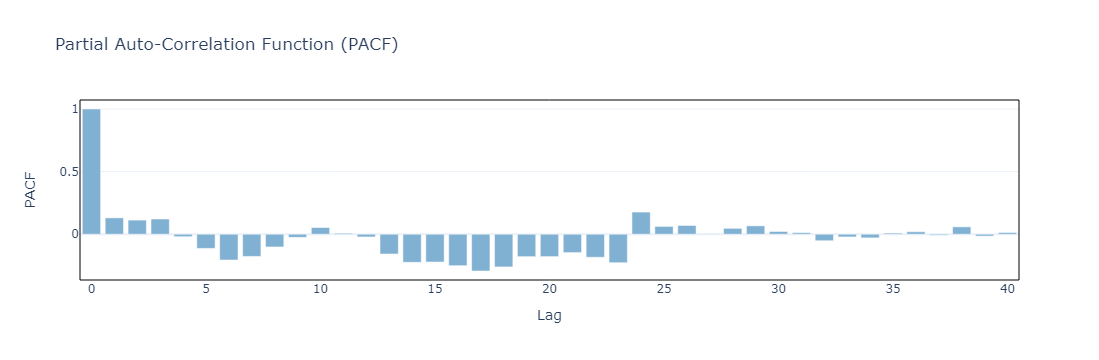

In [38]:
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

# Compute differenced series to remove seasonality
differenced_series = time_series_data.diff().dropna()

# Calculate ACF and PACF values
acf_values = acf(differenced_series, nlags=40)  # Adjust nlags as needed
pacf_values = pacf(differenced_series, nlags=40)

# Create an interactive plot for ACF
fig_acf = go.Figure()
fig_acf.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color='rgb(128,177,211)',name='ACF'))

fig_acf.update_layout(
    title='Auto-Correlation Function (ACF)',
    xaxis_title='Lag',
    yaxis_title='ACF',
    template='plotly_white',
    shapes=[dict(type='rect', xref='paper', yref='paper', x0=0, y0=0, x1=1, y1=1, line=dict(color='black', width=1))]
)
fig_acf.show()

# Create an interactive plot for PACF
fig_pacf = go.Figure()
fig_pacf.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values,marker_color='rgb(128,177,211)', name='PACF'))

fig_pacf.update_layout(
    title='Partial Auto-Correlation Function (PACF)',
    xaxis_title='Lag',
    yaxis_title='PACF',
    template='plotly_white',
    shapes=[dict(type='rect', xref='paper', yref='paper', x0=0, y0=0, x1=1, y1=1, line=dict(color='black', width=1))]
)
fig_pacf.show()

##### PACF (Partial Autocorrelation Function): 
This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1.
##### ACF (Autocorrelation Function): 
This plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autocorrelations are not significantly different from zero. The ACF plot in our case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there’s a gradual tailing off rather than a sharp cut-off, it suggests a potential MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered.

The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the value of d as 1.

##### | SARIMA | - 
We choose the SARIMA model since seasonality exists

C:\Users\Niranjan Bhole\AppData\Local\Temp\ipykernel_2784\870163226.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



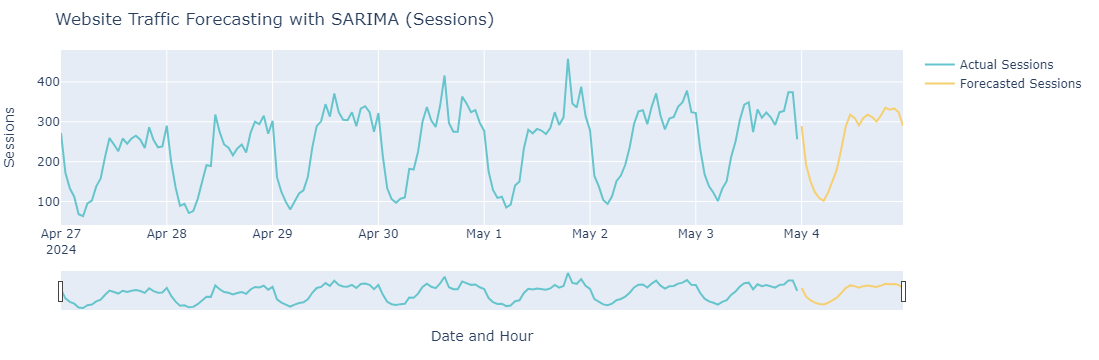

In [39]:
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')

# Seasonal period
seasonal_period = 24

# Fit the SARIMA model
sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# Forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# Define colors
actual_color = 'rgb(102,197,204)'
forecast_color = 'rgb(246,207,113)'

# Plotting the actual data and the SARIMA forecast
actual_trace = go.Scatter(
    x=time_series_data.index[-168:], 
    y=time_series_data[-168:], 
    mode='lines', 
    name='Actual Sessions',
    line=dict(color=actual_color)
)

forecast_trace = go.Scatter(
    x=pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], 
    y=sarima_forecast, 
    mode='lines', 
    name='Forecasted Sessions',
    line=dict(color=forecast_color)
)

layout = go.Layout(
    title='Website Traffic Forecasting with SARIMA (Sessions)',
    xaxis_title='Date and Hour',
    yaxis_title='Sessions',
    showlegend=True,
    xaxis=dict(rangeslider=dict(visible=True)),
    paper_bgcolor='white',    # Background color of the entire figure
    margin=dict(l=50, r=50, t=50, b=50)  # Margin around the plot
)

fig = go.Figure(data=[actual_trace, forecast_trace], layout=layout)
fig.show()


In [40]:
# Evaluating forecasts
actual = time_series_data[-24:].values  # last 24 actual data points
forecast = sarima_forecast.values  # forecasted values

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Mean Percentage Error (MPE)
def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

# Calculate the metrics
mape = mean_absolute_percentage_error(actual, forecast)
me = np.mean(forecast - actual)
mae = mean_absolute_error(actual, forecast)
mpe = mean_percentage_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
corr = np.corrcoef(actual, forecast)[0, 1]
minmax = np.max(actual - forecast) - np.min(actual - forecast)

# Store the metrics in a dictionary
metrics = {
    "MAPE": mape,
    "ME": me,
    "MAE": mae,
    "MPE": mpe,
    "RMSE": rmse,
    "Correlation": corr,
    "Min-Max Error": minmax
}

# Print the metrics
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

MAPE: 7.72
ME: -12.25
MAE: 20.36
MPE: 4.78
RMSE: 24.28
Correlation: 0.97
Min-Max Error: 84.12


1. **Mean Absolute Percentage Error (MAPE): 7.72%:**
MAPE measures the accuracy of the forecast by calculating the average absolute percentage error. A MAPE of 7.72% indicates that, on average, the forecast is off by about 7.72% from the actual values. This is considered reasonably accurate, especially in time series forecasting where MAPE values below 10% are often seen as very good.

2. **Mean Error (ME): -12.25:**
ME is the average of the forecast errors. A negative ME value suggests that the forecast tends to underestimate the actual values. The absolute value of 12.25 shows the average magnitude of this underestimation. While not ideal, it’s important to consider the context and whether this underestimation is consistent or varies significantly across the data.

3. **Mean Absolute Error (MAE): 20.36:**
MAE represents the average absolute difference between the forecasted and actual values. An MAE of 20.36 indicates that, on average, the forecast is off by 20.36 sessions. Depending on the scale of your data, this might be acceptable. For example, if the average number of sessions is in the hundreds or thousands, an MAE of 20.36 would be quite small.

4. **Mean Percentage Error (MPE): 4.78%:**
MPE is similar to ME but expressed as a percentage. A positive MPE of 4.78% indicates that, on average, the forecast overestimates the actual values by about 4.78%. Since both ME and MPE show slight biases in different directions, it suggests that while individual errors might cancel each other out, there is still some systemic bias.

5. **Root Mean Squared Error (RMSE): 24.28:**
RMSE is similar to MAE but gives more weight to larger errors. An RMSE of 24.28 suggests that larger errors are slightly more significant, but not excessively so. Like MAE, the acceptability of RMSE depends on the scale of your data.

6. **Correlation: 0.97:**
The correlation coefficient between the forecasted and actual values is 0.97, which indicates a very strong positive linear relationship. This means that the forecasted values track very closely with the actual values, which is a very good sign of forecast accuracy.

7. **Min-Max Error: 84.12:**
The Min-Max Error is less commonly used but measures the difference between the maximum and minimum forecast errors. An error of 84.12 suggests that there might be outliers or significant discrepancies in some forecasts. This metric alone doesn’t provide much insight but could point to specific periods where the forecast was less accurate.

**Overall Evaluation**
- MAPE and MPE: Both indicate reasonably accurate forecasts with some minor bias.
- ME and MAE: Show a tendency to underestimate slightly, but the overall magnitude of errors is relatively low.
- RMSE: Indicates that larger errors are not excessively penalizing the forecast.
- Correlation: Very strong, suggesting that the forecast captures the overall trend and variability well.
- Min-Max Error: Indicates potential outliers or periods of larger discrepancies.